<h1 style="text-align:center;"> Project: Develop an NLP Pipeline </h1> 

<h3 style="text-align:center;">Instructor: Assan Sanogo</h3>

<h3>Project Overview:</h3>
<p>This project is based on a dataset of 7000+ essays graded by English specialists. This data problem is close to a real-world situation as it requires to be cleaned, an EDA must be thoroughly done so that the team can engineer relevant features.</p>
<p>This project is a NLP problem that will be the foundation of an English program used by the company Easy Sailing Language Training. Their ambition is to have a reliable tool to assess new students’ ability to write in English according to the IELTS grading system. In turn it would help prospective students in knowing how much time they need to invest to get to the next level.</p>

## Table of contents
* Introduction: Business Problem
* Data
    * data cleaning
    * data processing
* Methodology
* Analysis
* Results and Discussion
* Conclusion

### Introduction : 
<p><strong>DETEMLP</strong> is a project that aims to develop an end-to-end pipeline to process essays and output a grade describing the level of English proficiency. This project is based on a dataset of 7000+ essays graded by English specialists. </p>
<p>The goal is to <strong>create a reliable tool to assess new students’ ability to write in English according to the IELTS grading system</strong>. In this project, we’ll be using data processing, data cleaning, and NLP techniques, including the librairie Spacy. If during this trip we struggle with the dataset, we might reframe the problem as a classification problem.</p>
<p>Let’s dive in</p>

### Data<a name="data"></a>
<p>
Our data collection has been really simplify, here the list of our dataset : </p>
<ul>
<li>test_set.tsv</li>
<li>training_set_rel3.tsv</li>
<li>training_set_rel3.xls</li>
<li>training_set_rel3.xlsx</li>
<li>valid_sample_submission_1_column.csv</li>
<li>valid_sample_submission_1_column_no_header.csv</li>
<li>valid_sample_submission_2_column.csv</li>
<li>valid_sample_submission_5_column.csv</li>
<li>valid_set.tsv</li>
<li>valid_set.xls</li>
<li>valid_set.xlsx </li>
</ul>

<p></p>

# Data Cleaning

**import librairies and download necessary files**

**Note:** you need ton install all packages before use its. 

In [360]:
import warnings  
warnings.filterwarnings('ignore')

# import packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import plotly.express as px
%matplotlib inline 
# for preprocessing
from sklearn import preprocessing




# NLTK librairies
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation
nltk.download('omw-1.4')
nltk.download('wordnet')

from spellchecker import SpellChecker
from textblob import TextBlob
import spacy
from collections import Counter
#import language_tool_python

# sklearn librairies
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,make_scorer, f1_score, average_precision_score, recall_score,roc_auc_score ,precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve



# xgboost library
import xgboost as xgb
from xgboost import XGBClassifier

# plot feature importance
from xgboost import plot_importance, plot_tree

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Download the neccesary packages**

In [361]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**Import the datasets**

In [362]:
# take a look to valid set
valid_set = pd.read_csv("valid_set.tsv",sep="\t",encoding="latin1")
valid_set.head()

essay_id  essay_set                                              essay  \
0      1788          1  Dear @ORGANIZATION1, @CAPS1 more and more peop...   
1      1789          1  Dear @LOCATION1 Time @CAPS1 me tell you what I...   
2      1790          1  Dear Local newspaper, Have you been spending a...   
3      1791          1  Dear Readers, @CAPS1 you imagine how life woul...   
4      1792          1  Dear newspaper, I strongly believe that comput...   

   domain1_predictionid  domain2_predictionid  
0                  1788                   NaN  
1                  1789                   NaN  
2                  1790                   NaN  
3                  1791                   NaN  
4                  1792                   NaN

**Infos into datasets**

In [363]:
valid_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   essay_id              4218 non-null   int64  
 1   essay_set             4218 non-null   int64  
 2   essay                 4218 non-null   object 
 3   domain1_predictionid  4218 non-null   int64  
 4   domain2_predictionid  600 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 164.9+ KB


In [364]:
# summary 
valid_set.describe()    

essay_id    essay_set  domain1_predictionid  domain2_predictionid
count   4218.000000  4218.000000           4218.000000            600.000000
mean   11282.446420     4.123518          13735.433618           7178.000000
std     6173.633131     2.117188           6964.020021            346.698716
min     1788.000000     1.000000           1788.000000           6579.000000
25%     5243.250000     2.000000           7508.500000           6878.500000
50%    10995.500000     4.000000          13995.500000           7178.000000
75%    16852.750000     6.000000          19852.750000           7477.500000
max    21938.000000     8.000000          24938.000000           7777.000000

**Missing values detection**

Here are the results of the missing values detection:

- "essay_id": 0 missing values
- "essay_set": 0 missing values
- "essay": 0 missing values
- "domain1_predictionid": 0 missing values
- "domain2_predictionid": 3618 missing values

In [365]:
valid_set.isnull().sum()   

essay_id                   0
essay_set                  0
essay                      0
domain1_predictionid       0
domain2_predictionid    3618
dtype: int64

**Import training set**

In [366]:
# take a look to train set
training_set= pd.read_csv("training_set_rel3.tsv",sep="\t",encoding="latin1")
training_set.head(2)

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   

   rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
0               4               4             NaN              8   
1               5               4             NaN              9   

   rater1_domain2  rater2_domain2  domain2_score  ...  rater2_trait3  \
0             NaN             NaN            NaN  ...            NaN   
1             NaN             NaN            NaN  ...            NaN   

   rater2_trait4  rater2_trait5  rater2_trait6  rater3_trait1  rater3_trait2  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   

   rater3_trait3  rater3_trait4  rater3_trait5  rater3_trait6  
0            NaN            NaN            NaN            NaN  
1            NaN            NaN            NaN            NaN  

[2 rows x 28 columns]

In [367]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

**Missing values**

In [368]:
training_set.isnull().sum()   

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

**Valid sample submission**

A "valid dataset test" typically refers to a dataset that is used specifically for testing the performance and generalization ability of a machine learning model

In [369]:
# valid sample submission
sample_submission = pd.read_csv("valid_sample_submission_5_column.csv",encoding="latin1")
sample_submission.head()

prediction_id  essay_id  essay_set  essay_weight  predicted_score
0           1788      1788          1           1.0                7
1           1789      1789          1           1.0                8
2           1790      1790          1           1.0                9
3           1791      1791          1           1.0                9
4           1792      1792          1           1.0                9

In [370]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   prediction_id    4818 non-null   int64  
 1   essay_id         4818 non-null   int64  
 2   essay_set        4818 non-null   int64  
 3   essay_weight     4818 non-null   float64
 4   predicted_score  4818 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 188.3 KB


In [371]:
sample_submission.describe()

prediction_id      essay_id   essay_set  essay_weight  predicted_score
count    4818.000000   4818.000000  4818.00000   4818.000000      4818.000000
mean    12918.816729  10509.725820     3.85907      0.875467         6.240764
std      6867.367811   6129.318271     2.10140      0.216259         8.308969
min      1788.000000   1788.000000     1.00000      0.500000         0.000000
25%      7193.250000   5085.250000     2.00000      1.000000         2.000000
50%     13694.500000  10694.500000     4.00000      1.000000         3.000000
75%     19702.750000  16702.750000     6.00000      1.000000         7.000000
max     24938.000000  21938.000000     8.00000      1.000000        50.000000

In [372]:
sample_submission.isnull().sum()    # no missing values 

prediction_id      0
essay_id           0
essay_set          0
essay_weight       0
predicted_score    0
dtype: int64

### Missing values

In [373]:
# function to check missing values
def Missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    print(missing_data[(percent>0)],'\n' )

In [374]:
# % Missing values for the dataset for each column
Missing_values(training_set)

                Total  Pourcentage
rater3_trait6   12848     0.990136
rater3_trait5   12848     0.990136
rater3_trait4   12848     0.990136
rater3_trait3   12848     0.990136
rater3_domain1  12848     0.990136
rater3_trait2   12848     0.990136
rater3_trait1   12848     0.990136
rater1_trait6   12253     0.944282
rater2_trait6   12253     0.944282
rater2_trait5   12253     0.944282
rater1_trait5   12253     0.944282
rater1_domain2  11176     0.861282
rater2_domain2  11176     0.861282
domain2_score   11176     0.861282
rater1_trait2   10684     0.823366
rater2_trait3   10684     0.823366
rater1_trait3   10684     0.823366
rater2_trait4   10684     0.823366
rater2_trait2   10684     0.823366
rater2_trait1   10684     0.823366
rater1_trait1   10684     0.823366
rater1_trait4   10684     0.823366 



The percentage of missing values is very high for many variables, exceeding even 80 percent. Therefore, we will delete these variables, as the proportion is very high."

In [375]:
training_set.drop(columns=['rater1_domain1','rater2_domain1','rater3_domain1',
       'rater1_domain2', 'rater2_domain2', 'domain2_score', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6'], axis=1, inplace=True)

In [376]:
training_set.head(2)

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   

   domain1_score  
0              8  
1              9

### SKEWNESS

The code uses the displot function from the Seaborn library (sns) to create a distribution plot of the 'domain1_score' column in the DataFrame training_set before and after normalization. Here's a breakdown of what each part of the code does:

- sns.displot: This is a function from the Seaborn library used to create distribution plots.
- training_set **domain1_score**: This specifies the column 'domain1_score' from the DataFrame training_set.
- kde=True: This parameter specifies that the plot should include a kernel density estimation (KDE) plot, which provides a smoothed estimate of the probability density function of the data.

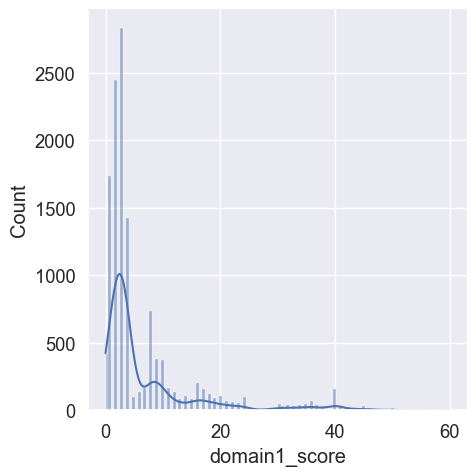

In [377]:
#Check Skewness before normalization
sns.displot(training_set['domain1_score'], kde=True)
plt.show()

In [378]:
# function to normalize the score
def normalizer(training_set, domain1_score):
    min_values = training_set.groupby('essay_set')[domain1_score].min()
    max_values = training_set.groupby('essay_set')[domain1_score].max()
    training_set['normalized_score'] = training_set.apply(lambda row: (row[domain1_score] - min_values[row['essay_set']]) / (max_values[row['essay_set']] - min_values[row['essay_set']]), axis=1)
    return training_set

In [379]:
#Apply the Function normalizer to training set
training_set = (training_set.groupby('essay_set', group_keys=False, as_index=False).apply(lambda group: normalizer(group, 'domain1_score')))
training_set.head(2)

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   

   domain1_score  normalized_score  
0              8               0.6  
1              9               0.7

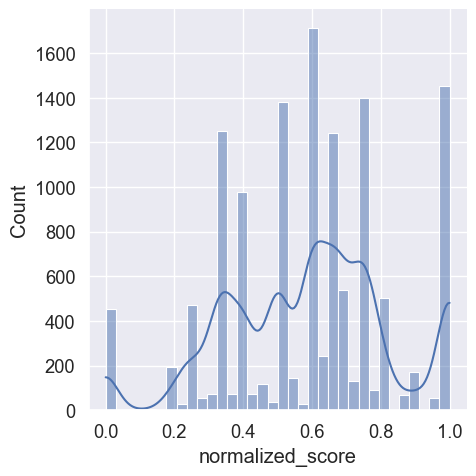

In [380]:
#Check Skew after normalization
sns.displot(training_set['normalized_score'], kde=True)
plt.show()

In [381]:
#show the descriptive statistics of the normalized_score and domain1_score
training_set[['domain1_score', 'normalized_score']].describe().round(3)

domain1_score  normalized_score
count      12976.000         12976.000
mean           6.800             0.589
std            8.971             0.240
min            0.000             0.000
25%            2.000             0.400
50%            3.000             0.600
75%            8.000             0.750
max           60.000             1.000

#### Normalization interpretation 
- Before applying the normalization, We observe a high frequency of lower scores, particularly between 0 and 10.
- After applying the normalization,the plot displays multiple peaks, indicating various concentrations of normalized scores. The scores are spread across a more diverse range allowing for better comparison and analysis.
In summary,The spread of scores is more consistent after normalization

In [382]:
# check info on our dataset
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12976 entries, 0 to 12975
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   essay_id          12976 non-null  int64  
 1   essay_set         12976 non-null  int64  
 2   essay             12976 non-null  object 
 3   domain1_score     12976 non-null  int64  
 4   normalized_score  12976 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 608.2+ KB


#### Univariate Analysis
Through the below training_set analysis it can be seen that there is an uneven distribution of 2 observations : "the number of each score" and "the number of each essay". we will show it by plotting the distribution of each observation. 

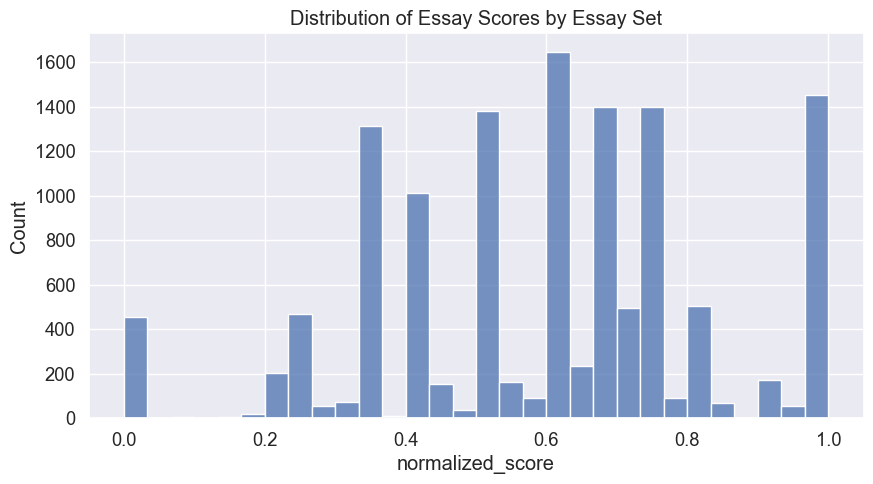

In [383]:
# The below code generates a visually appealing count plot to showcase the 
      # display the distribution of the number of essay for each score
plt.figure(figsize=(10,5))
sns.histplot(data=training_set, x='normalized_score', bins=30)
plt.title('Distribution of Essay Scores by Essay Set')
plt.show()

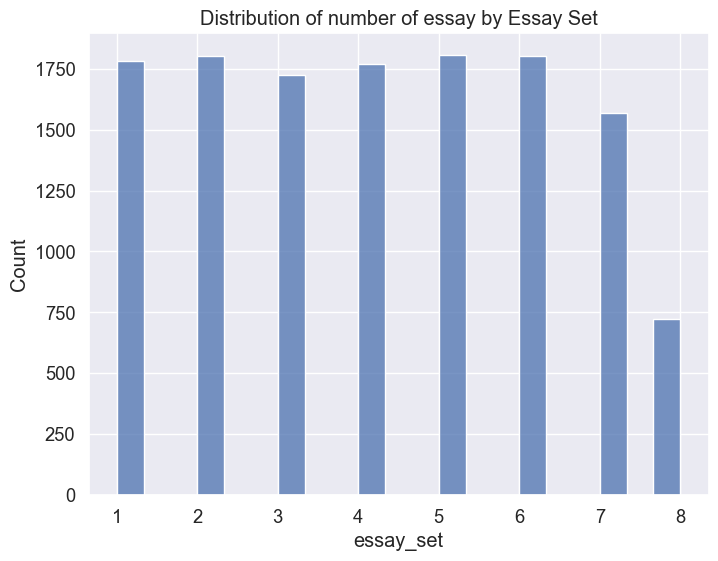

In [384]:
# The below code generates a visually appealing count plot to showcase the 
        # display the distribution of number of essay for each essay_set
plt.figure(figsize=(8, 6))
sns.histplot(training_set, x='essay_set')
plt.title('Distribution of number of essay by Essay Set')
plt.show()

We can see that we have an imbalanced training_set.

# Data Preprocessing

First, we need to preprocess the texts and remove mentions, punctuation, stop words, links to websites, non-alphanumeric characters, single characters, and extra spaces. Here, we will use the built-in TweetTokenizer in NLTK to tokenize the sentence.

- Cleaning the text: In this step, we need to remove special characters and numbers from the text. We can use the expand function, which will replace short English notations with the full form and remove special characters, numbers from the text, etc.

- Removing stop words: Stop words are very common words that usually do not carry specific meaning in the context of text analysis. In english, examples of stop words could be "the", "and", etc. Stop words are often excluded when indexing or searching text.

- Preprocessing: The preprocess_text function cleans the data by removing stop words and applying other necessary transformations.

Then, compute some features to measure the quality of a text.


In [385]:
def expand(sent):
    "This function will replace english short notations with full form"
    
    sent=re.sub(r"can't", "can not",sent)
    sent=re.sub(r"won't", "will not",sent)
    sent=re.sub(r"n\'t", " not",sent)
    sent=re.sub(r"\'re", " are",sent)
    sent=re.sub(r"\'m"," am",sent)
    sent=re.sub(r"\'s"," is",sent)
    sent=re.sub(r"\'ll"," will",sent)
    sent=re.sub(r"\'ve"," have",sent)
    sent=re.sub(r"\'d"," would",sent)
    sent=re.sub(r"\'t", " not",sent)
    
    return sent
    
# Create a stop word list    
stopword= stopwords.words('english')



def preprocess_text(text, stopwords): # text :, stopword = stopword
    "function for preprocess the text data"
    
    preprocessed_text=[]
    
    for sentence in text:
        sent=expand(sentence) # use the spand function
        sent=sent.replace("\\r"," ")
        sent=sent.replace("\\n"," ")
        sent=sent.replace('\\"'," ")
        sent=re.sub("[^A-Za-z0-9]+"," ",sent)
        
        #
        sent=" ".join(i for i in sent.split() if i.lower() not in stopword)
        preprocessed_text.append(sent.lower().strip())
        
    return preprocessed_text # after pre-processing

In [386]:
training_set['essay_text'] = preprocess_text(training_set['essay'], stopwords=stopword)

In [387]:
training_set.head(2)

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   

   domain1_score  normalized_score  \
0              8               0.6   
1              9               0.7   

                                          essay_text  
0  dear local newspaper think effects computers p...  
1  dear caps1 caps2 believe using computers benef...

**Lemmatization:** Lemmatization is a natural language processing process that aims to reduce words to their base form, called lemma. The lemma is the canonical form of a word that represents its main meaning. For example, the lemmas of the words "work", "works", and "worked" are all "work"

In [388]:
lemmatizer = WordNetLemmatizer()


# Function to lemmatize a sentence
def lemmatize_sentence(sentence):
    words = sentence.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_sentence = ' '.join(lemmatized_words)
    return lemmatized_sentence

# Apply lemmatization to the 'text' column
training_set['essay_text'] = training_set['essay_text'].apply(lemmatize_sentence)
training_set.head(2)

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   

   domain1_score  normalized_score  \
0              8               0.6   
1              9               0.7   

                                          essay_text  
0  dear local newspaper think effect computer peo...  
1  dear caps1 caps2 believe using computer benefi...

In [389]:
# The below code is a function computing text complexity based on words and word structure

# Since we preprocess the text by removing punctuation and lowercasing it, we indeed end up with only one sentence per text. 
# In this case, we don't need to count the number of sentences (sentences variable) because there is only one.
def readability_indices(text):
    indices = {}
    words = len(text.split())
    syllables = text.count('a') + text.count('e') + text.count('i') + text.count('o') + text.count('u')
    characters = len(text)
    complex_words = sum(1 for word in text.split() if len(word) > 2 and word[-1] in ['e', 's'] and word[-2] in ['l', 'i'])
    long_words = sum(1 for word in text.split() if len(word) > 6)

    if words == 0 or characters == 0:
        return indices

    # Flesch Reading Ease
    indices['flesch_reading_ease'] = 206.835 - 1.015 * (words / 1) - 84.6 * (syllables / words)

    # Flesch-Kincaid Grade Level
    indices['flesch_kincaid_grade'] = 0.39 * (words / 1) + 11.8 * (syllables / words) - 15.59

    # Gunning Fog Index
    indices['gunning_fog'] = 0.4 * ((words / 1) + 100 * (complex_words / words))

    # SMOG Index
    indices['smog_index'] = 1.0430 * (30 * (complex_words / 1)) + 3.1291

    # Automated Readability Index
    indices['ari_index'] = 4.71 * (characters / words) + 0.5 * (words / 1) - 21.43

    # Coleman-Liau Index
    indices['coleman_liau_index'] = 5.89 * (characters / words) - 29.6 * (1 / words) - 15.8

    # LIX Readability Index
    indices['lix_index'] = words / 1 + (100 * (long_words / words))

    # RIX Readability Index
    indices['rix_index'] = 1 / words

    return indices


 


In [390]:
# Apply the readability_indices function to the 'essay_text' column and create a new column for each indices
training_set = pd.concat([training_set, training_set['essay_text'].apply(readability_indices).apply(pd.Series)], axis=1)
 
training_set.head(2)

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   

   domain1_score  normalized_score  \
0              8               0.6   
1              9               0.7   

                                          essay_text  flesch_reading_ease  \
0  dear local newspaper think effect computer peo...          -131.364639   
1  dear caps1 caps2 believe using computer benefi...          -202.020000   

   flesch_kincaid_grade  gunning_fog  smog_index   ari_index  \
0             72.821084    67.604819    159.5791   92.014759   
1             97.333333    90.711111    128.2891  121.444267   

   coleman_liau_index   lix_index  rix_index  
0           22.093795  194.313253   0.006024  
1           22.052400  257.000000   0.004444

In [391]:
# The below code is a function computing text Complexity by measuring lexical features

def lexical_features(text):
    features = {}

    # Number of words
    features['word_count'] = len(text.split())

    # Number of characters
    features['char_count'] = len(text)

    # Average word length
    features['avg_word_length'] = sum(len(word) for word in text.split())/len(text.split())

    # Average sentence length (same as word count)
    features['avg_sentence_length'] = features['word_count']

    # Number of syllables
    features['syllable_count'] = sum(len(list(y for y in x if y in 'aeiou')) for x in text.split())

    return features


In [392]:
# Apply the lexical_features function to the 'essay_text' column and create a new column for each indices
training_set = pd.concat([training_set, training_set['essay_text'].apply(lexical_features).apply(pd.Series)], axis=1)
 
training_set.head(2)

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   

   domain1_score  normalized_score  \
0              8               0.6   
1              9               0.7   

                                          essay_text  flesch_reading_ease  \
0  dear local newspaper think effect computer peo...          -131.364639   
1  dear caps1 caps2 believe using computer benefi...          -202.020000   

   flesch_kincaid_grade  gunning_fog  smog_index   ari_index  \
0             72.821084    67.604819    159.5791   92.014759   
1             97.333333    90.711111    128.2891  121.444267   

   coleman_liau_index   lix_index  rix_index  word_count  char_count  \
0           22.093795  194.313253   0.006024       166.0      1073.0   
1           22.052400  257.000000   0.004444       225.0      1451.0   

   avg_word_length  avg_sentence_length  syllable_count  
0         5.469880                166.0           333.0  
1         5.453333                225.0           480.0

In [393]:
# The below code is a function computing text Complexity via the syntactic structure of the sentences

def syntactic_features(text):
    """
    This function will return a dictionary containing various syntactic features
    calculated from the given text.
    """
    features = {}

    # Part-of-speech tagging
    pos_tags = pos_tag(word_tokenize(text))

    # Number of nouns
    features['noun_count'] = len([word for word, pos in pos_tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']])

    # Number of verbs
    features['verb_count'] = len([word for word, pos in pos_tags if pos in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']])

    # Number of adjectives
    features['adj_count'] = len([word for word, pos in pos_tags if pos in ['JJ', 'JJR', 'JJS']])

    # Number of adverbs
    features['adv_count'] = len([word for word, pos in pos_tags if pos in ['RB', 'RBR', 'RBS']])

    # Number of pronouns
    features['pron_count'] = len([word for word, pos in pos_tags if pos in ['PRP', 'PRP$', 'WP', 'WP$']])

    # Number of prepositions
    features['prep_count'] = len([word for word, pos in pos_tags if pos in ['IN']])

    # Number of interjections
    features['interj_count'] = len([word for word, pos in pos_tags if pos in ['UH']])

    return features


In [394]:
# Apply the lexical_features function to the 'essay_text' column and create a new column for each indices
training_set = pd.concat([training_set, training_set['essay_text'].apply(syntactic_features).apply(pd.Series)], axis=1)
 
training_set.head(2)

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   

   domain1_score  normalized_score  \
0              8               0.6   
1              9               0.7   

                                          essay_text  flesch_reading_ease  \
0  dear local newspaper think effect computer peo...          -131.364639   
1  dear caps1 caps2 believe using computer benefi...          -202.020000   

   flesch_kincaid_grade  gunning_fog  smog_index  ...  avg_word_length  \
0             72.821084    67.604819    159.5791  ...         5.469880   
1             97.333333    90.711111    128.2891  ...         5.453333   

   avg_sentence_length  syllable_count  noun_count  verb_count  adj_count  \
0                166.0           333.0          75          40         32   
1                225.0           480.0         109          56         29   

   adv_count  pron_count  prep_count  interj_count  
0         11           4           1             0  
1          9           0           7             0  

[2 rows x 26 columns]

In [395]:
# The below code is a function computing text quality via the spelling and grammar of the sentences
def quality_features(text):
    """
    This function will return a dictionary containing various quality features
    calculated from the given text.
    """
    features = {}
 
    # Misspelling score
    spell = SpellChecker()
    misspelled = spell.unknown(text.split())
    features['misspelled_count'] = len(misspelled)
 
    return features

In [396]:
# Apply the lexical_features function to the 'quality_features' column and create a new column for each indices
training_set = pd.concat([training_set, training_set['essay_text'].apply(quality_features).apply(pd.Series)], axis=1)
 
training_set.head(2)

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   

   domain1_score  normalized_score  \
0              8               0.6   
1              9               0.7   

                                          essay_text  flesch_reading_ease  \
0  dear local newspaper think effect computer peo...          -131.364639   
1  dear caps1 caps2 believe using computer benefi...          -202.020000   

   flesch_kincaid_grade  gunning_fog  smog_index  ...  avg_sentence_length  \
0             72.821084    67.604819    159.5791  ...                166.0   
1             97.333333    90.711111    128.2891  ...                225.0   

   syllable_count  noun_count  verb_count  adj_count  adv_count  pron_count  \
0           333.0          75          40         32         11           4   
1           480.0         109          56         29          9           0   

   prep_count  interj_count  misspelled_count  
0           1             0                15  
1           7             0                23  

[2 rows x 27 columns]

# CORRELATION MATRIX 

We plot the correlation matrix with respect of each essay to understand the relationships between variables in the training_set.

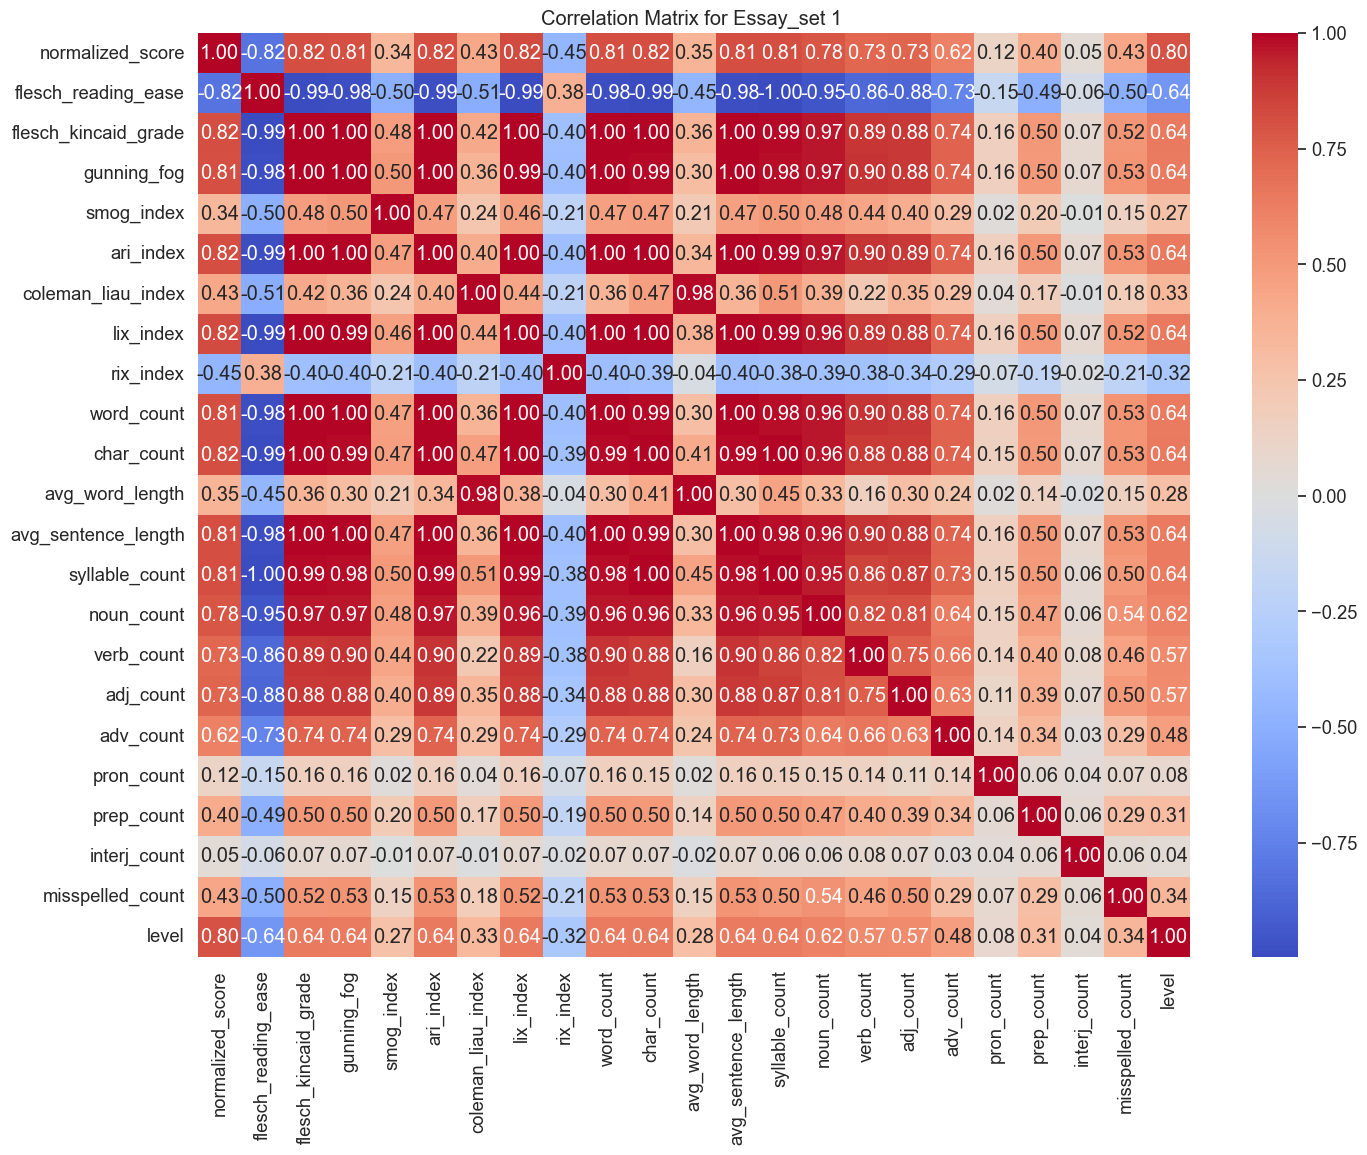

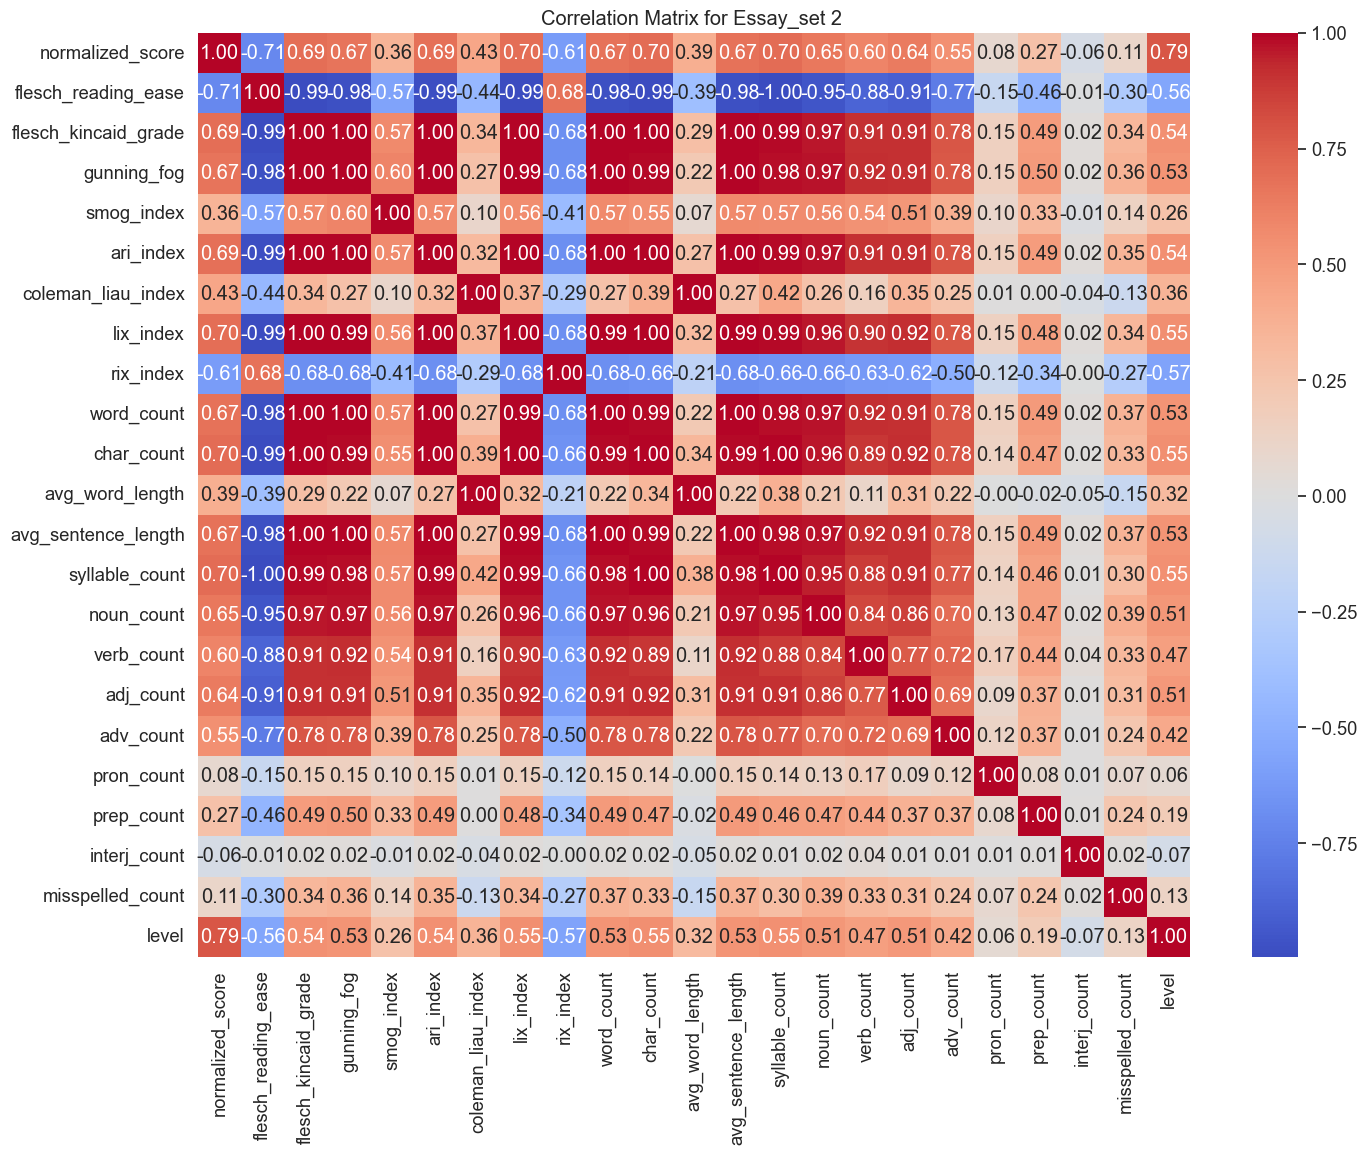

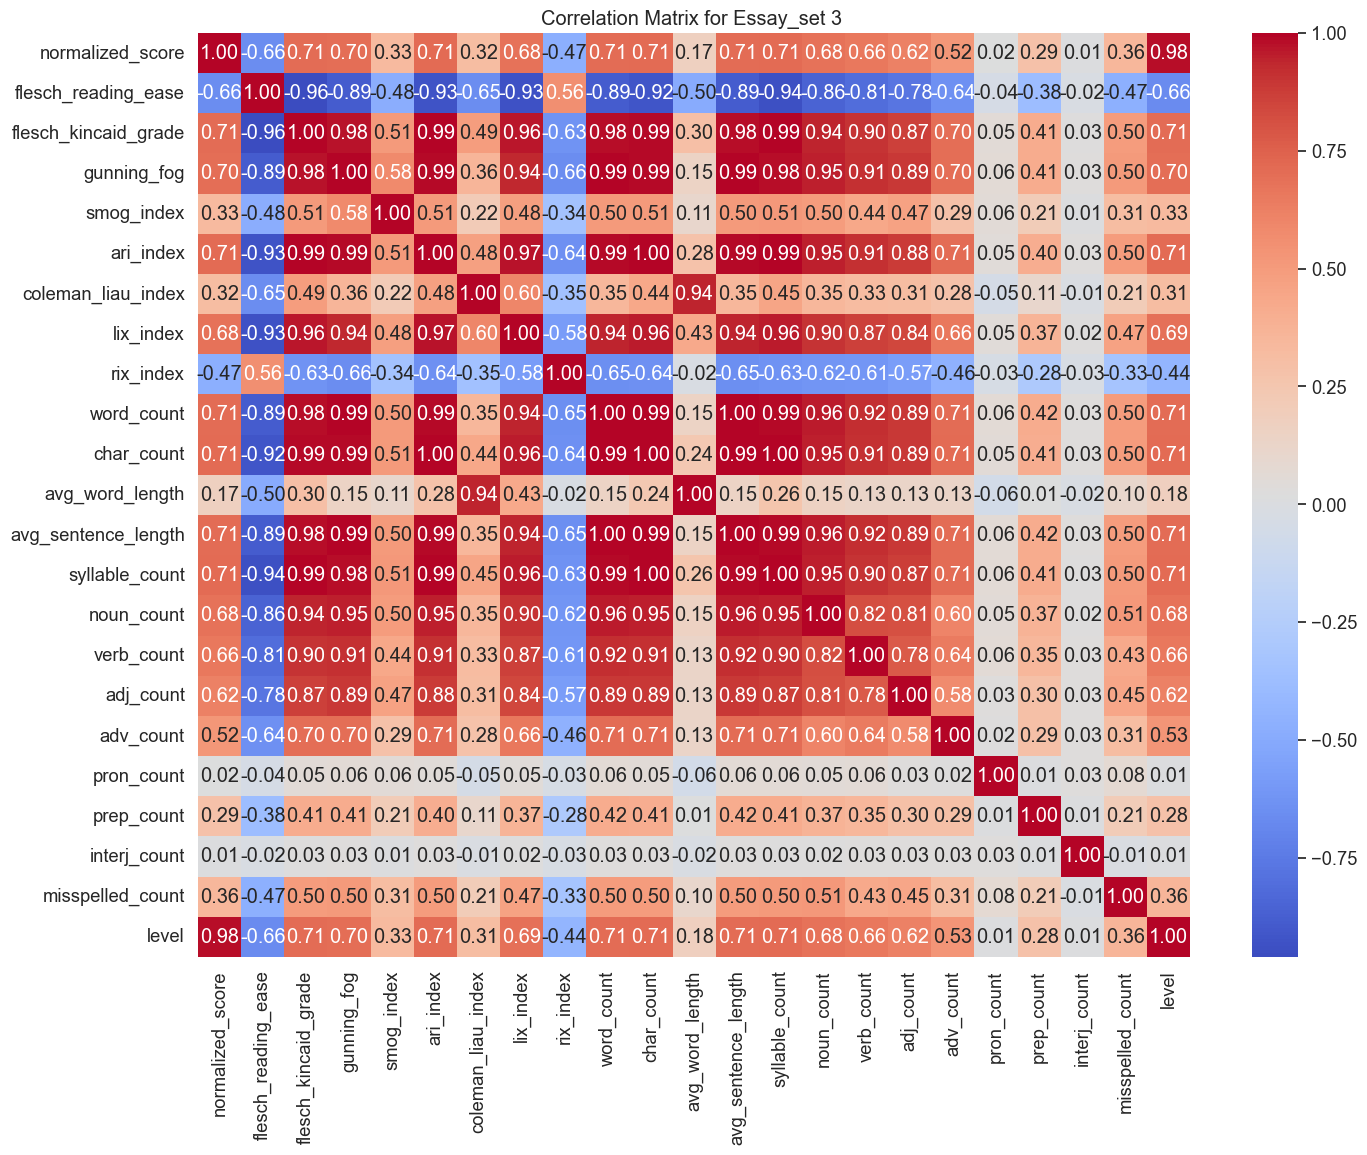

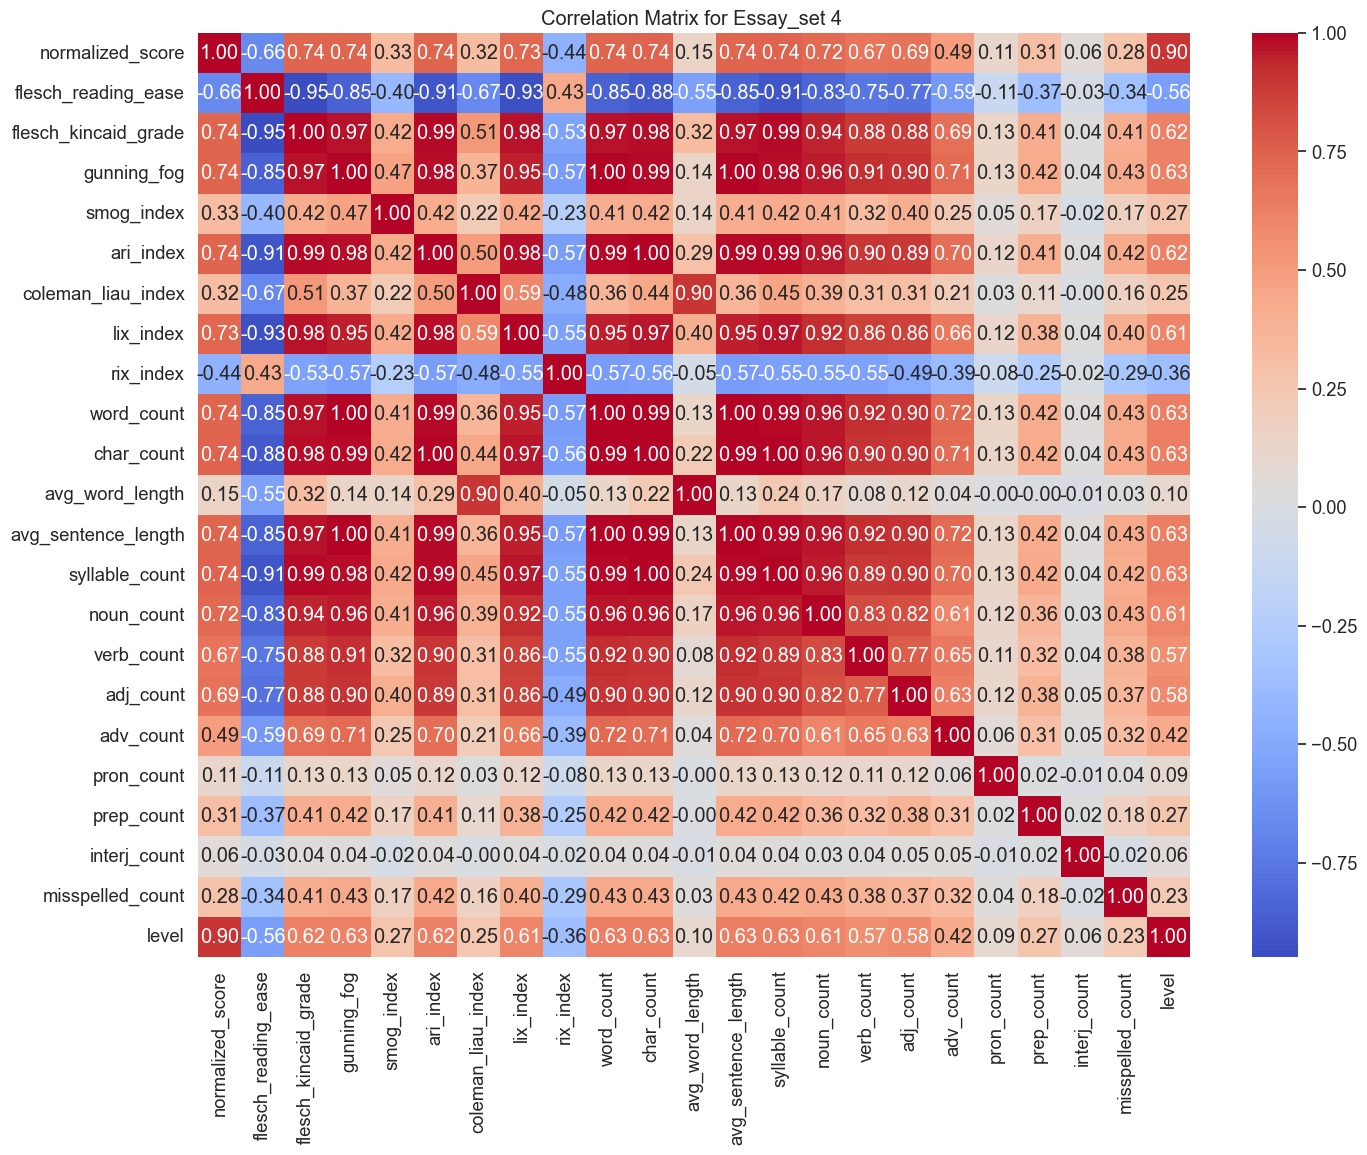

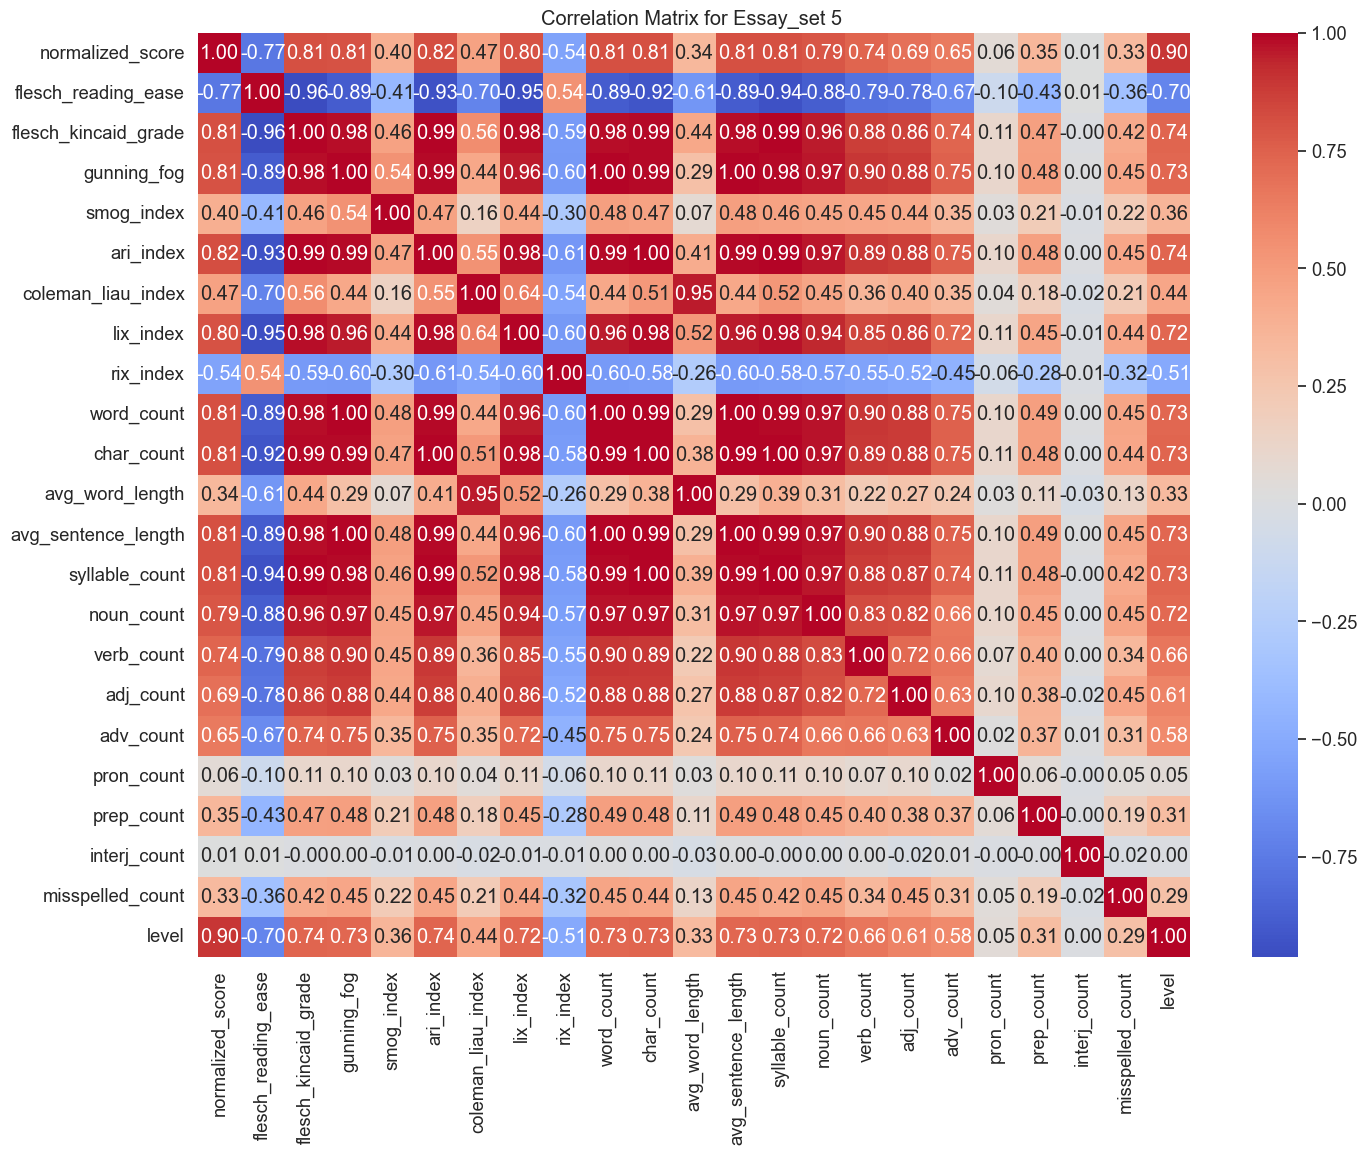

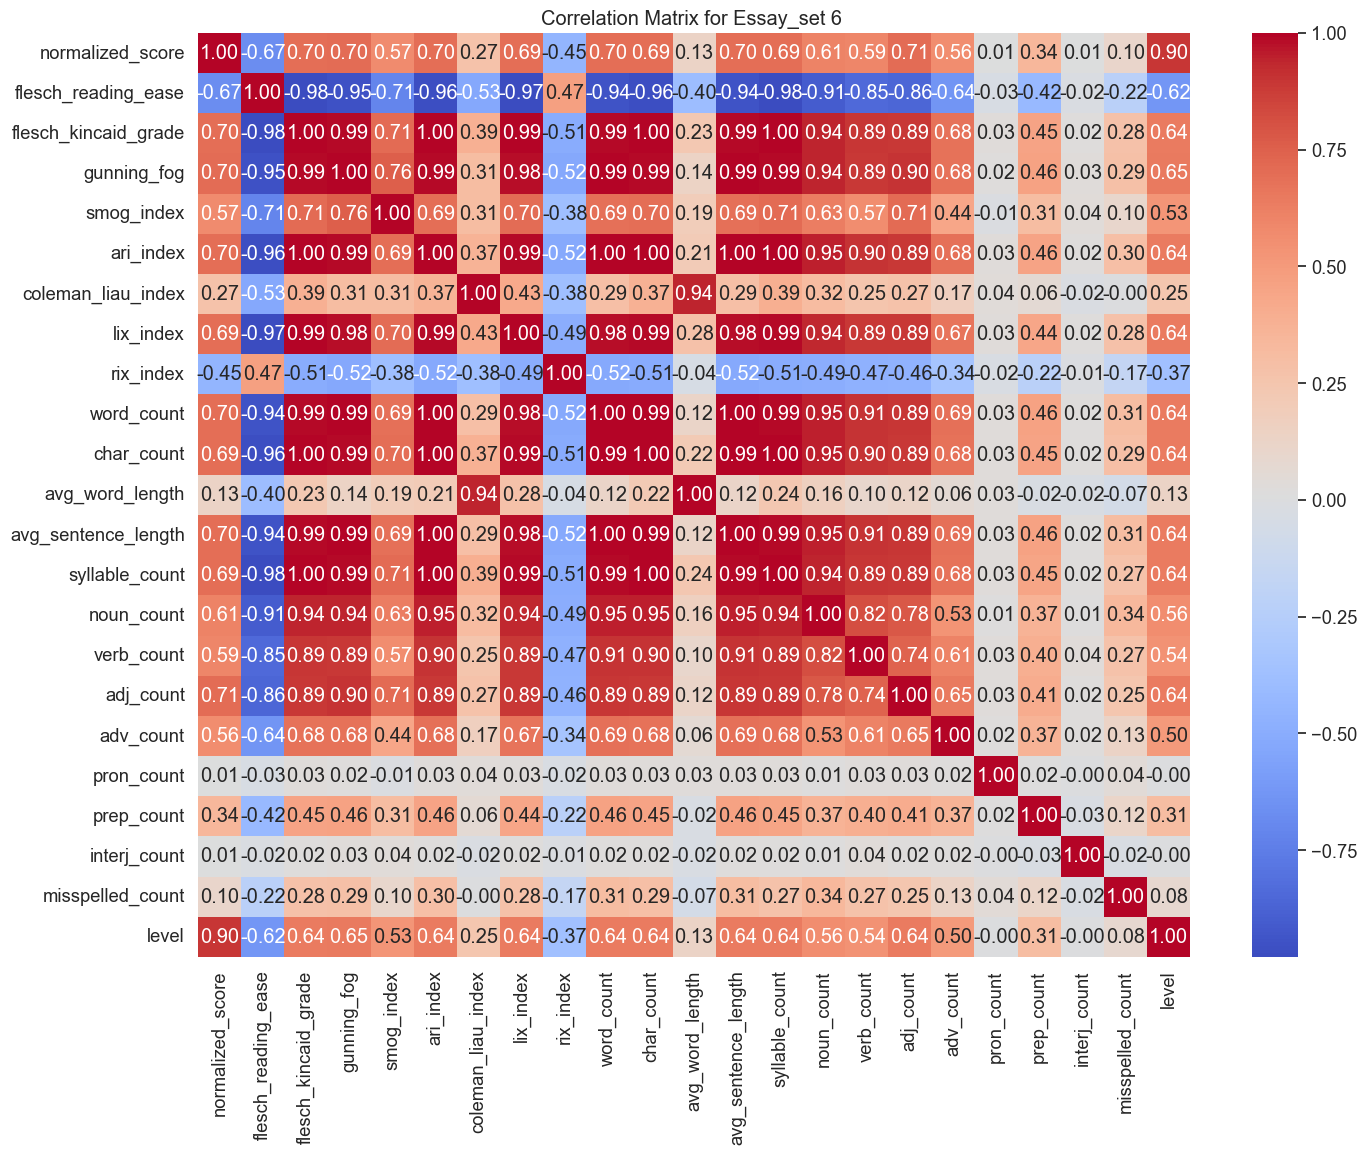

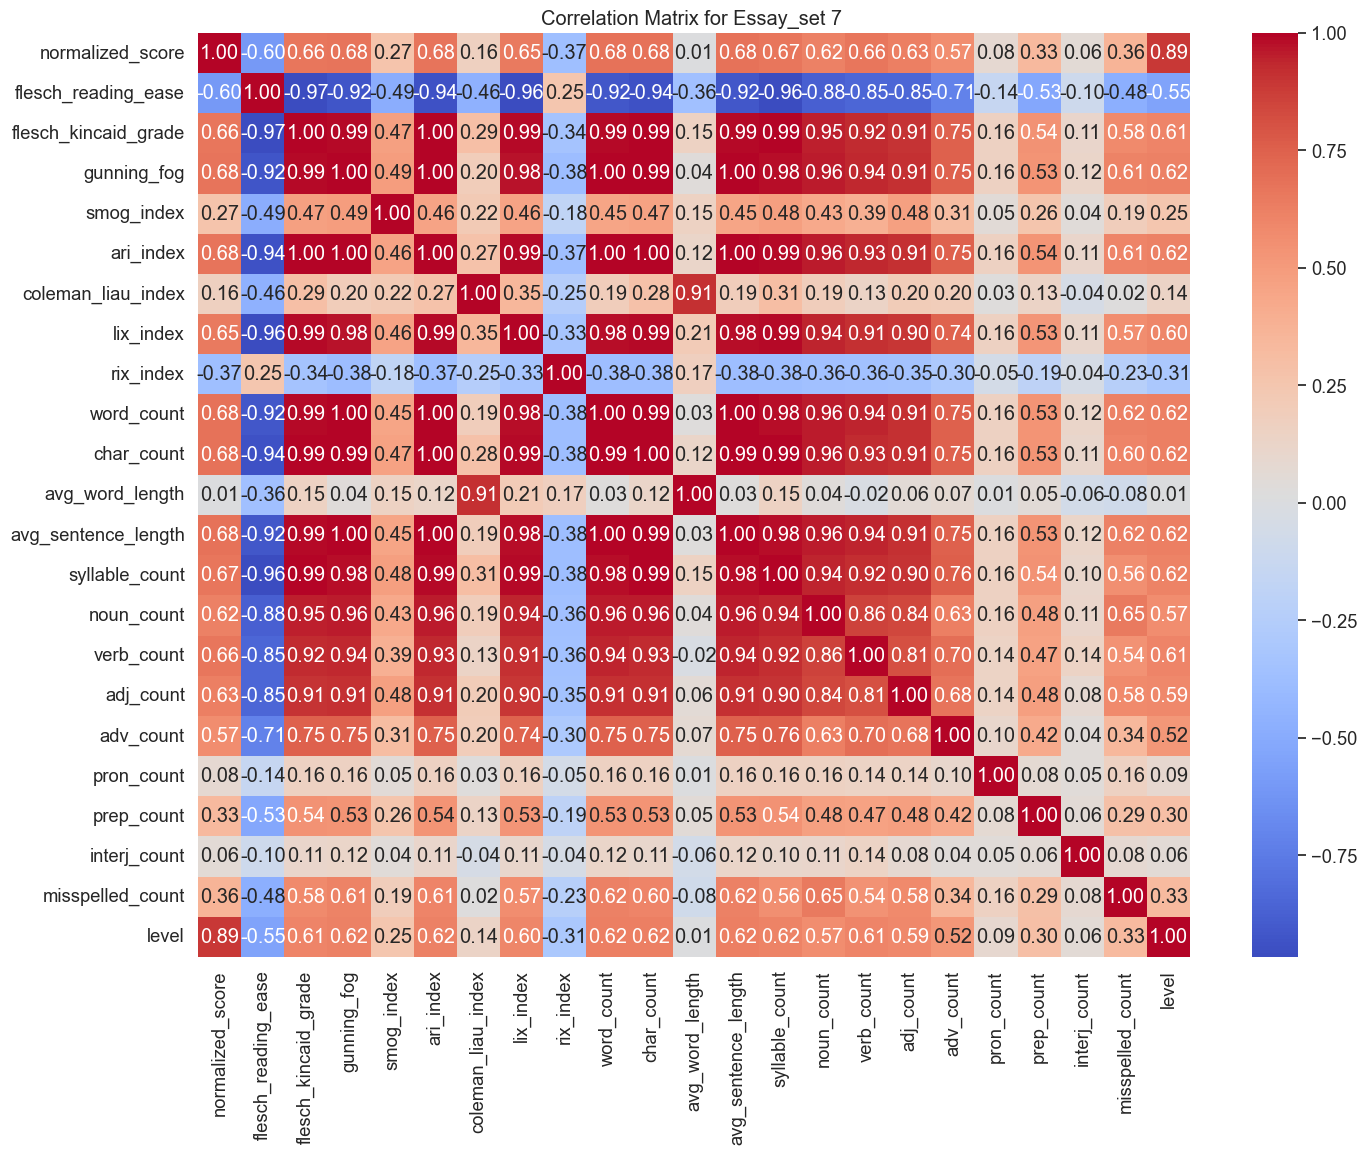

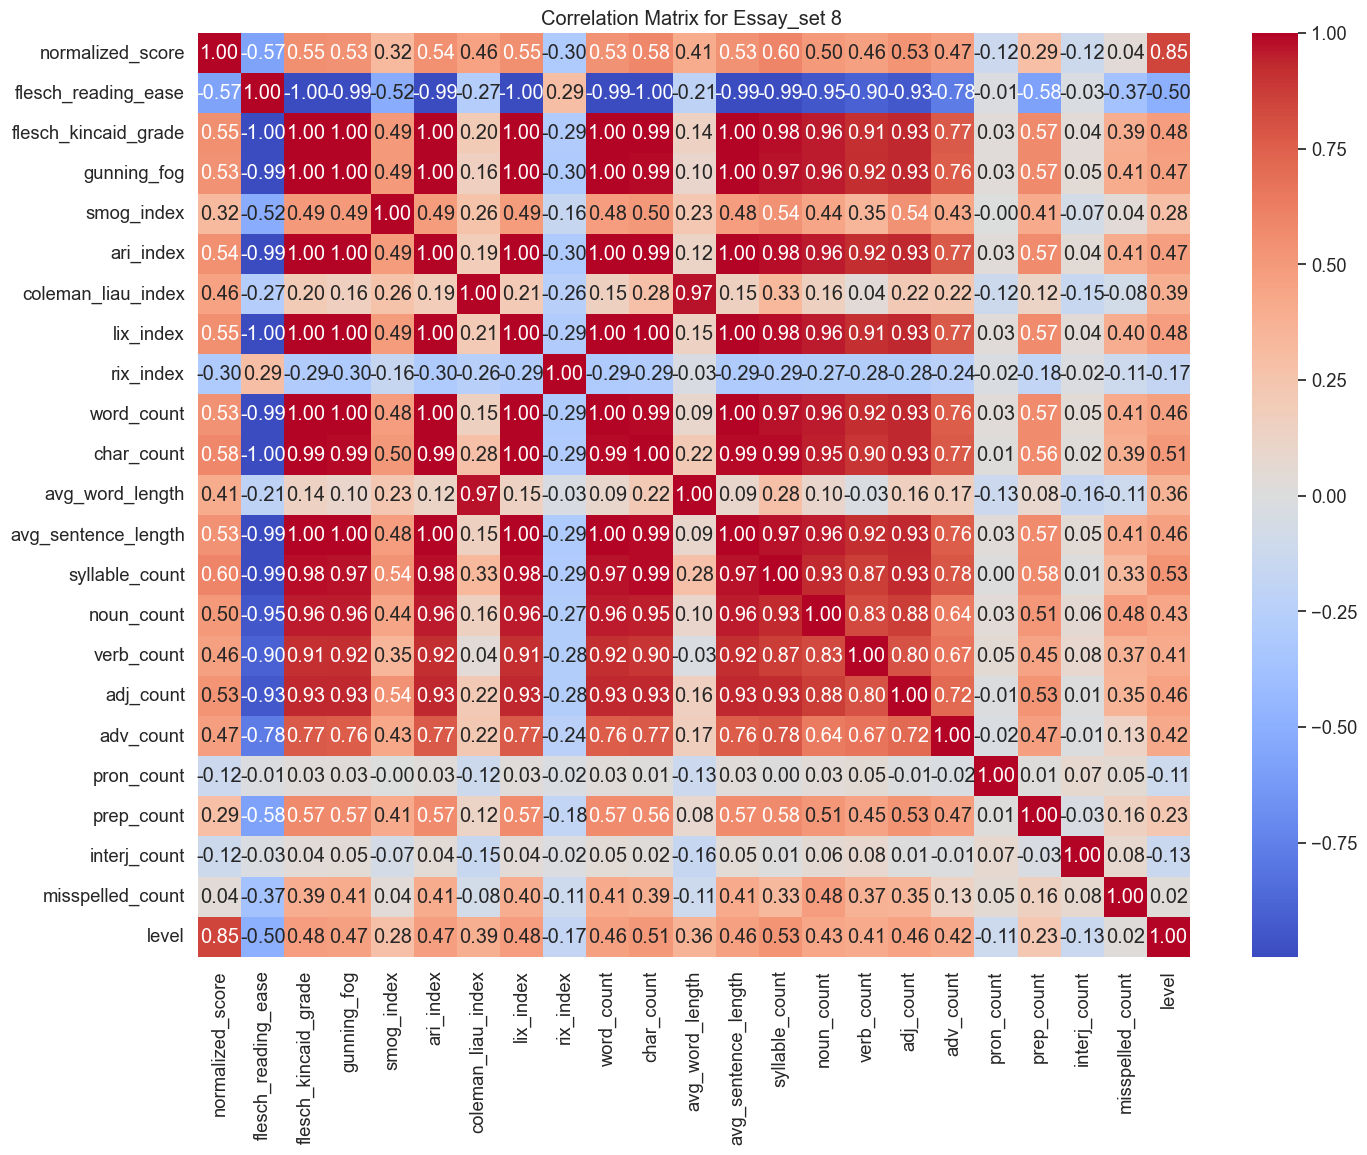

In [443]:
# plot the correlation matrix for each essay set
essay_types = training_set['essay_set'].unique()
essay_dfs = {essay_type: training_set[training_set['essay_set'] == essay_type] for essay_type in essay_types}
for essay_type, essay_df in essay_dfs.items():
    # Get the selected columns including 'normalized_score' and columns from 'flesch_reading_ease' onwards
    selected_columns = ['normalized_score'] + essay_df.iloc[:,6:].columns.tolist()
    corr_matrix = essay_df[selected_columns].corr()
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for Essay_set {essay_type} ')
    plt.show()

<IMBALANCED DATA SET>

# Building a Classification model with some classifiers

#### Let's build our valid_set
We will apply all process applied to the training_set to the valid_set.

- First, we will merge the valid_set with the sample_submission in order to get the score of each essay
- second, we will apply the function normalizer to normalize the different score to get a column normalized_score
- third we will apply on column essay all functions used during the preprocessing step to get a column essay_text

In [398]:
# Merge the valid set with the sample submission
valid_set= pd.merge(valid_set,sample_submission[['prediction_id','predicted_score']], left_on='domain1_predictionid', right_on='prediction_id')
valid_set.head(2)

essay_id  essay_set                                              essay  \
0      1788          1  Dear @ORGANIZATION1, @CAPS1 more and more peop...   
1      1789          1  Dear @LOCATION1 Time @CAPS1 me tell you what I...   

   domain1_predictionid  domain2_predictionid  prediction_id  predicted_score  
0                  1788                   NaN           1788                7  
1                  1789                   NaN           1789                8

In [399]:
valid_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   essay_id              4218 non-null   int64  
 1   essay_set             4218 non-null   int64  
 2   essay                 4218 non-null   object 
 3   domain1_predictionid  4218 non-null   int64  
 4   domain2_predictionid  600 non-null    float64
 5   prediction_id         4218 non-null   int64  
 6   predicted_score       4218 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 230.8+ KB


In [400]:
# drop  useless column
valid_s= valid_set.drop(columns=["domain2_predictionid","domain1_predictionid",'prediction_id'], axis=1, inplace=True)

In [401]:
valid_set.head(2)

essay_id  essay_set                                              essay  \
0      1788          1  Dear @ORGANIZATION1, @CAPS1 more and more peop...   
1      1789          1  Dear @LOCATION1 Time @CAPS1 me tell you what I...   

   predicted_score  
0                7  
1                8

In [402]:
# apply the normalizer function to the valid set (1)
def normalizer1(valid_set, column_name):
    min_values = valid_set.groupby('essay_set')[column_name].min()
    max_values = valid_set.groupby('essay_set')[column_name].max()
    valid_set['normalized_score'] = valid_set.apply(lambda row: (row[column_name] - min_values[row['essay_set']]) / (max_values[row['essay_set']] - min_values[row['essay_set']]), axis=1)
    return valid_set

In [403]:
#apply the normalizer function to the valid set (2)
valid_set = (valid_set.groupby('essay_set', group_keys=False, as_index=False).apply(lambda group: normalizer(group, 'predicted_score')))

In [404]:
#Apply all the preprocessing steps to the valid set
valid_set['essay_text'] = preprocess_text(valid_set['essay'], stopwords=stopword)

In [405]:
#lemmatize the 'text' column
valid_set['essay_text'] = valid_set['essay_text'].apply(lemmatize_sentence)
valid_set.head(2)

essay_id  essay_set                                              essay  \
0      1788          1  Dear @ORGANIZATION1, @CAPS1 more and more peop...   
1      1789          1  Dear @LOCATION1 Time @CAPS1 me tell you what I...   

   predicted_score  normalized_score  \
0                7               0.5   
1                8               0.6   

                                          essay_text  
0  dear organization1 caps1 people start use comp...  
1  dear location1 time caps1 tell think computer ...

In [406]:
# Apply all all functions used during the preprocessing step to get a column essay_text
    # Apply the readability_indices function to the 'essay_text' column and create a new column for each indices
valid_set = pd.concat([valid_set, valid_set['essay_text'].apply(readability_indices).apply(pd.Series)], axis=1)

In [407]:
# Apply all all functions used during the preprocessing step to get a column essay_text
    # Apply the lexical_features function to the 'essay_text' column and create a new column for each indices
valid_set = pd.concat([valid_set, valid_set['essay_text'].apply(lexical_features).apply(pd.Series)], axis=1)

In [408]:
# Apply all all functions used during the preprocessing step to get a column essay_text
    # Apply the syntactic_features function to the 'essay_text' column and create a new column for each indices
valid_set = pd.concat([valid_set, valid_set['essay_text'].apply(syntactic_features).apply(pd.Series)], axis=1)

In [409]:
# Apply all all functions used during the preprocessing step to get a column essay_text
    # Apply the quality_features function to the 'essay_text' column and create a new column for each indices
valid_set = pd.concat([valid_set, valid_set['essay_text'].apply(quality_features).apply(pd.Series)], axis=1)

In [410]:
valid_set.sample(2)

essay_id  essay_set                                              essay  \
145      1935          1  Dear Newspaper @CAPS1 of @LOCATION1 town times...   
141      1931          1  Dear @ORGANIZATION1 is spending a lot of time ...   

     predicted_score  normalized_score  \
145               10               0.8   
141                7               0.5   

                                            essay_text  flesch_reading_ease  \
145  dear newspaper caps1 location1 town time caps2...          -230.800323   
141  dear organization1 spending lot time computer ...           -54.825435   

     flesch_kincaid_grade  gunning_fog  smog_index  ...  avg_sentence_length  \
145            107.061452   100.006452    159.5791  ...                248.0   
141             43.761739    37.234783     34.4191  ...                 92.0   

     syllable_count  noun_count  verb_count  adj_count  adv_count  pron_count  \
145           545.0         111          57         45         24           0   
141           183.0          44          23         12          6           0   

     prep_count  interj_count  misspelled_count  
145           1             0                35  
141           4             0                 8  

[2 rows x 27 columns]

#### ASSIGN THE LEVEL OF ENGLISH


This code defines two functions. The first function, assign_level, takes a score and the essay set number as input and assigns an English level based on the score and essay set. The second function, classify_levels, adds a new level column to a given DataFrame using the assign_level function to compute the levels for each row based on the specified scores and essay sets.
The "level" will be our target variable.

In [411]:

def Eng_level(data_frame, column_name):
    # Group the DataFrame by 'essay_set' and calculate the mean and std for each group
    group_stats = data_frame.groupby('essay_set')[column_name].agg(['mean', 'std'])
    # Get the column data
    column_data = data_frame[column_name]
    
    # Define the level function using group statistics
    def level(row_idx):
        if pd.isna(column_data[row_idx]):  # Check for NaN values
            return np.nan  # Return NaN if the value is NaN
        essay_set = data_frame.at[row_idx, 'essay_set']
        score = column_data[row_idx]
        mean = group_stats.loc[essay_set, 'mean']
        std = group_stats.loc[essay_set, 'std']
        if score <= mean - std:
            return 0
        elif score >= mean + std:
            return 2
        else: 
            return 1
    
    # Apply the level function to each row index and assign the result to a new column 'level'
    data_frame['level'] = [level(i) for i in range(len(data_frame))]
    
    # Return the modified DataFrame
    return data_frame




In [413]:
# Apply the Eng_level function to the training_set and the valid set
training_set = Eng_level(training_set, 'normalized_score')
valid_set = Eng_level(valid_set, 'normalized_score')

In [414]:
# Check the unique values in the 'level' column for the training_set and the valid set
training_set.level.unique()
valid_set.level.unique()

array([0, 1, 2], dtype=int64)

*Class distribution*

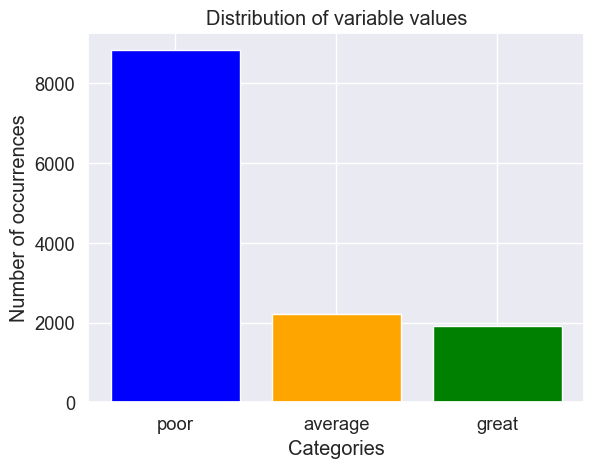

In [415]:
class_names = ['poor','average','great']
counts = [len(training_set.level[training_set.level == val]) for val in training_set.level.unique()]

# Plot the diagram
plt.bar(class_names, counts, color=['blue', 'orange', 'green'])

# Add titles and labels
plt.title("Distribution of variable values")
plt.xlabel("Categories")
plt.ylabel("Number of occurrences")

# Show the diagram
plt.show()

**Class distribution:** There are more essay with class 0 ( poor) than class 1 and 2 ( average and great). We can say that the dataset is imbalanced with 8834 poor essays (68%) and 4142 average and great essays (32%). Since the data is imbalanced, we will be applying data-balancing techniques like undersampling while building the model

In [416]:
# Divide the data into groups based on the 'level' variable
groups = training_set.groupby('level')


In [417]:
groups.describe()

essay_id                                                               \
         count          mean          std   min      25%      50%       75%   
level                                                                         
0       2223.0  10565.006298  5674.131276  14.0  6596.50   9644.0  15331.00   
1       8834.0   9945.400951  6532.093436   1.0  3834.25   9930.5  15595.75   
2       1919.0  11594.254820  5756.329406  16.0  7020.50  12156.0  16130.00   

               essay_set            ... interj_count      misspelled_count  \
           max     count      mean  ...          75%  max            count   
level                               ...                                      
0      21624.0    2223.0  4.271255  ...          0.0  4.0           2223.0   
1      21633.0    8834.0  4.062033  ...          0.0  2.0           8834.0   
2      21621.0    1919.0  4.613861  ...          0.0  3.0           1919.0   

                                                      
           mean       std  min  25%  50%   75%   max  
level                                                 
0      3.758884  4.985883  0.0  1.0  2.0   5.0  51.0  
1      7.045506  6.799399  0.0  2.0  5.0  10.0  95.0  
2      7.434601  7.156071  0.0  3.0  5.0  10.0  47.0  

[3 rows x 200 columns]

**Note for our imbalanced class**

We will reduce the number of the samples in each class to the number of samples in the smallest class. It is done by randomly selecting samples. 

In [418]:
# Sample a specific number of observations from each group
training_set_tr = groups.apply(lambda x: x.sample(1919))

# Reset the index of the sampled subset of data
training_set_tr.reset_index(drop=True, inplace=True)

In [419]:
# Check the unique values in the 'level' column for the training_set_tr
training_set_tr.level.unique()

array([0, 1, 2], dtype=int64)

In [420]:
training_set_tr.head(2)

essay_id  essay_set                                              essay  \
0      1569          1  The effect's computers have on people is not r...   
1      6039          3  In the story Do not exceed posted speed limit...   

   domain1_score  normalized_score  \
0              5          0.300000   
1              1          0.333333   

                                          essay_text  flesch_reading_ease  \
0  effect computer people resinable child people ...           -52.361864   
1  story exceed posted speed limit joe kurmaskie ...           -11.651429   

   flesch_kincaid_grade  gunning_fog  smog_index  ...  syllable_count  \
0             35.220000    32.413559    409.8991  ...           139.0   
1             28.796429    25.971429    159.5791  ...           107.0   

   noun_count  verb_count  adj_count  adv_count  pron_count  prep_count  \
0          37          12          6          0           0           4   
1          28          10          9          6           0           0   

   interj_count  misspelled_count  level  
0             0                 8      0  
1             0                 5      0  

[2 rows x 28 columns]

In [421]:
# Drop the some columns from the training_set_tr and the valid set
training_set_tr.drop(columns=['essay','essay_text', 'domain1_score'], axis=1, inplace=True)


In [422]:
valid_set.drop(columns=['essay','essay_text', 'predicted_score'], axis=1, inplace=True)

### **Machine learning models**

In [423]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import BaggingClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split


In this section, we will train multiple types of classifiers and determine which classifier will be more effective in detecting fraudulent transactions. Before doing so, we need to split our data into training and testing sets and separate the features from the labels.

The larger the gap between the training score and the cross-validation score, the more your model is overfitting (high variance).

If the score is low in both the training and cross-validation sets, it indicates that our model is underfitting (high bias).

In [424]:
y_train = training_set_tr.level
X_train = training_set_tr.drop(['normalized_score','level'], axis=1)
y_test = valid_set.level
X_test = valid_set.drop(['normalized_score','level'], axis=1)

In [425]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "Gradientboostingclassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "XGBClassifier": XGBClassifier(),
    "BaggingClassifier": BaggingClassifier()
}

In [426]:
cl =[
    "LogisiticRegression",
    "KNearest",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "Gradientboostingclassifier",
    "AdaBoostClassifier",
    "XGBClassifier",
    "BaggingClassifier"]

Score = pd.DataFrame(columns=cl, index=['C_validation'])

In [427]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    Score.loc['C_validation', key] = round(training_score.mean(), 2)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 57.99999999999999 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 72.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 66.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 75.0 % accuracy score


Classifiers:  GradientBoostingClassifier Has a training score of 75.0 % accuracy score
Classifiers:  AdaBoostClassifier Has a training score of 72.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 74.0 % accuracy score
Classifiers:  BaggingClassifier Has a training score of 73.0 % accuracy score


#### **First conclusion**

Training scores range from 59% to 76% accuracy across different classifiers.There's variability in how well each classifier performs, indicating different levels of suitability for the task.
High training scores, particularly for Gradient Boosting and Random Forest, may suggest overfitting to the training data.
These scores establish a baseline for comparison with scores obtained post-optimization, guiding further enhancement efforts.
The use of various classifiers offers diversity in modeling strategies, potentially improving overall performance through ensemble techniques.
In summary, the initial analysis provides insights into each classifier's strengths and weaknesses, guiding subsequent optimization steps to enhance model performance.

### GridSearchCV to optimize our models 

we will the do a hyperparameter tuning GridSearchCV. GridSearchCV is a technique for hyperparameter tuning that exhaustively searches through a specified parameter grid to find the combination of hyperparameters that results in the best model performance. It works by:
- Defining a parameter grid with possible values for each hyperparameter.
- - Instantiating a GridSearchCV object with the estimator, parameter grid, and cross-validation strategy.
- Fitting the GridSearchCV object to the training data, which involves training the estimator with different hyperparameter combinations and evaluating performance using cross-validation.
- Retrieving the best hyperparameters found by accessing the best_params_ attribute.
- Using the best model obtained from the grid search to make predictions on test data and evaluate its performance.





In [428]:
# Regression Logistique best parametres
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_;

In [429]:
# mean cross-validation score of the logistic regression model
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  59.82%


In [430]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

In [431]:
knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

Knears Neighbors Cross Validation Score 70.73%


In [432]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [433]:
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

DecisionTree Classifier Cross Validation Score 67.41%


### **Testing**

we will evaluate the performance of each model

In [434]:
# test the error rate for each Classifier
def L(X,Y):
    a = (X-Y)**2
    return sum(a)/len(a) # Accuracy 

def Q(X, Y): #vrais positifs / (vrais positifs + faux positifs)
    a = abs(X - Y)
    return (len(a) - sum(a))/len(a)


In [435]:
l = []
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    l.append(classifier.predict(X_test))
    print("Classifiers: ", classifier.__class__.__name__, "Has a test error of", L(classifier.predict(X_test), y_test), "error score")

Classifiers:  LogisticRegression Has a test error of 0.6412991939307728 error score
Classifiers:  KNeighborsClassifier Has a test error of 0.2835467045993362 error score
Classifiers:  DecisionTreeClassifier Has a test error of 0.5177809388335705 error score


Classifiers:  RandomForestClassifier Has a test error of 0.35538169748696063 error score
Classifiers:  GradientBoostingClassifier Has a test error of 0.3541963015647226 error score
Classifiers:  AdaBoostClassifier Has a test error of 0.37339971550497864 error score
Classifiers:  XGBClassifier Has a test error of 0.3352299668089142 error score
Classifiers:  BaggingClassifier Has a test error of 0.44642010431484114 error score


In [436]:
b = []
c = []
for i in l:
    b.append(L(y_test, i))
    c.append(Q(y_test, i))

In [437]:
for i in range(len(cl)):
    Score.loc['Precision', cl[i]] = c[i] # Precision
    Score.loc['MSE', cl[i]] = b[i] # Mean Squared Error

In [438]:
# show the score
Score

LogisiticRegression  KNearest DecisionTreeClassifier  \
C_validation                0.58      0.72                   0.66   
Precision               0.400427  0.723092               0.518729   
MSE                     0.641299  0.283547               0.517781   

             RandomForestClassifier Gradientboostingclassifier  \
C_validation                   0.75                       0.75   
Precision                  0.648412                   0.652442   
MSE                        0.355382                   0.354196   

             AdaBoostClassifier XGBClassifier BaggingClassifier  
C_validation               0.72          0.74              0.73  
Precision              0.634187       0.67046           0.56733  
MSE                      0.3734       0.33523           0.44642

In [439]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\marti\\anaconda3\\envs\\pytho_bootcamp\\lib\\site-packages\\matplotlib\\pyplot.py'>

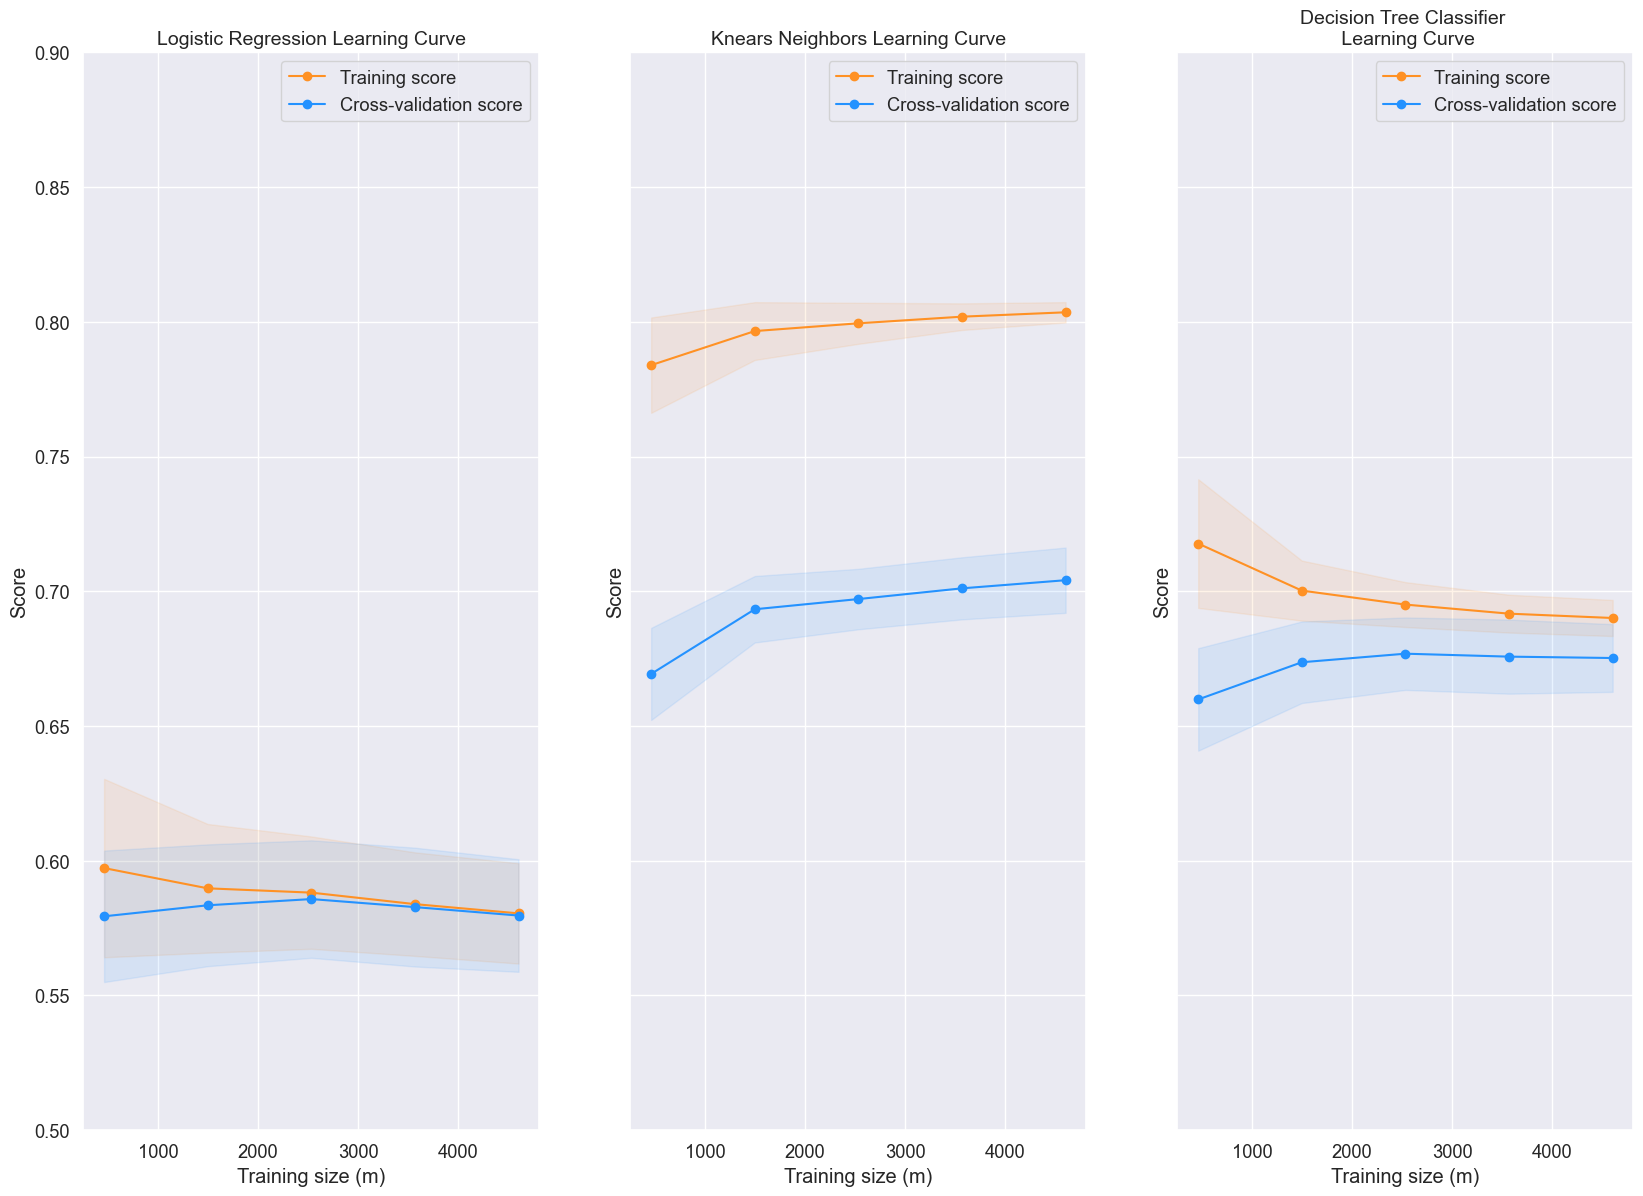

In [440]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, tree_clf, X_train, y_train, (0.5, 0.9), cv=cv, n_jobs=4)

#### Interpretation

Logistic Regression Learning Curve : the small gap with lower scores on both curves suggests high bias, indicating that the model is underfitting and may need more complexity or features to improve performance.

Knears Neighbors Learning Curve : The large gap suggests high variance, meaning the model is overfitting to the training data and may not generalize well to new data

Decision Tree Classifier Learning Curve : the small gap with high scores on both curves suggests low bias and variance, indicating a good model fit

#### Let's plot the confusion matrix for all the models

The confusion matrices represent the performance of our different machine learning classifiers. Each matrix displays the counts of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for three classes (poor, average, and great).
We can see that:
-  the Gradient Boosting Classifier has highest TP rate for class 0 and class 2 but lower TP rate for class 1.
-  the Random Forest Classifier has balanced TP rates across all classes.
-  the logistic Regression and K-Nearest have some misclassifications but generally performing well.
-  and the Decision Tree and AdaBoost has Significant misclassifications.

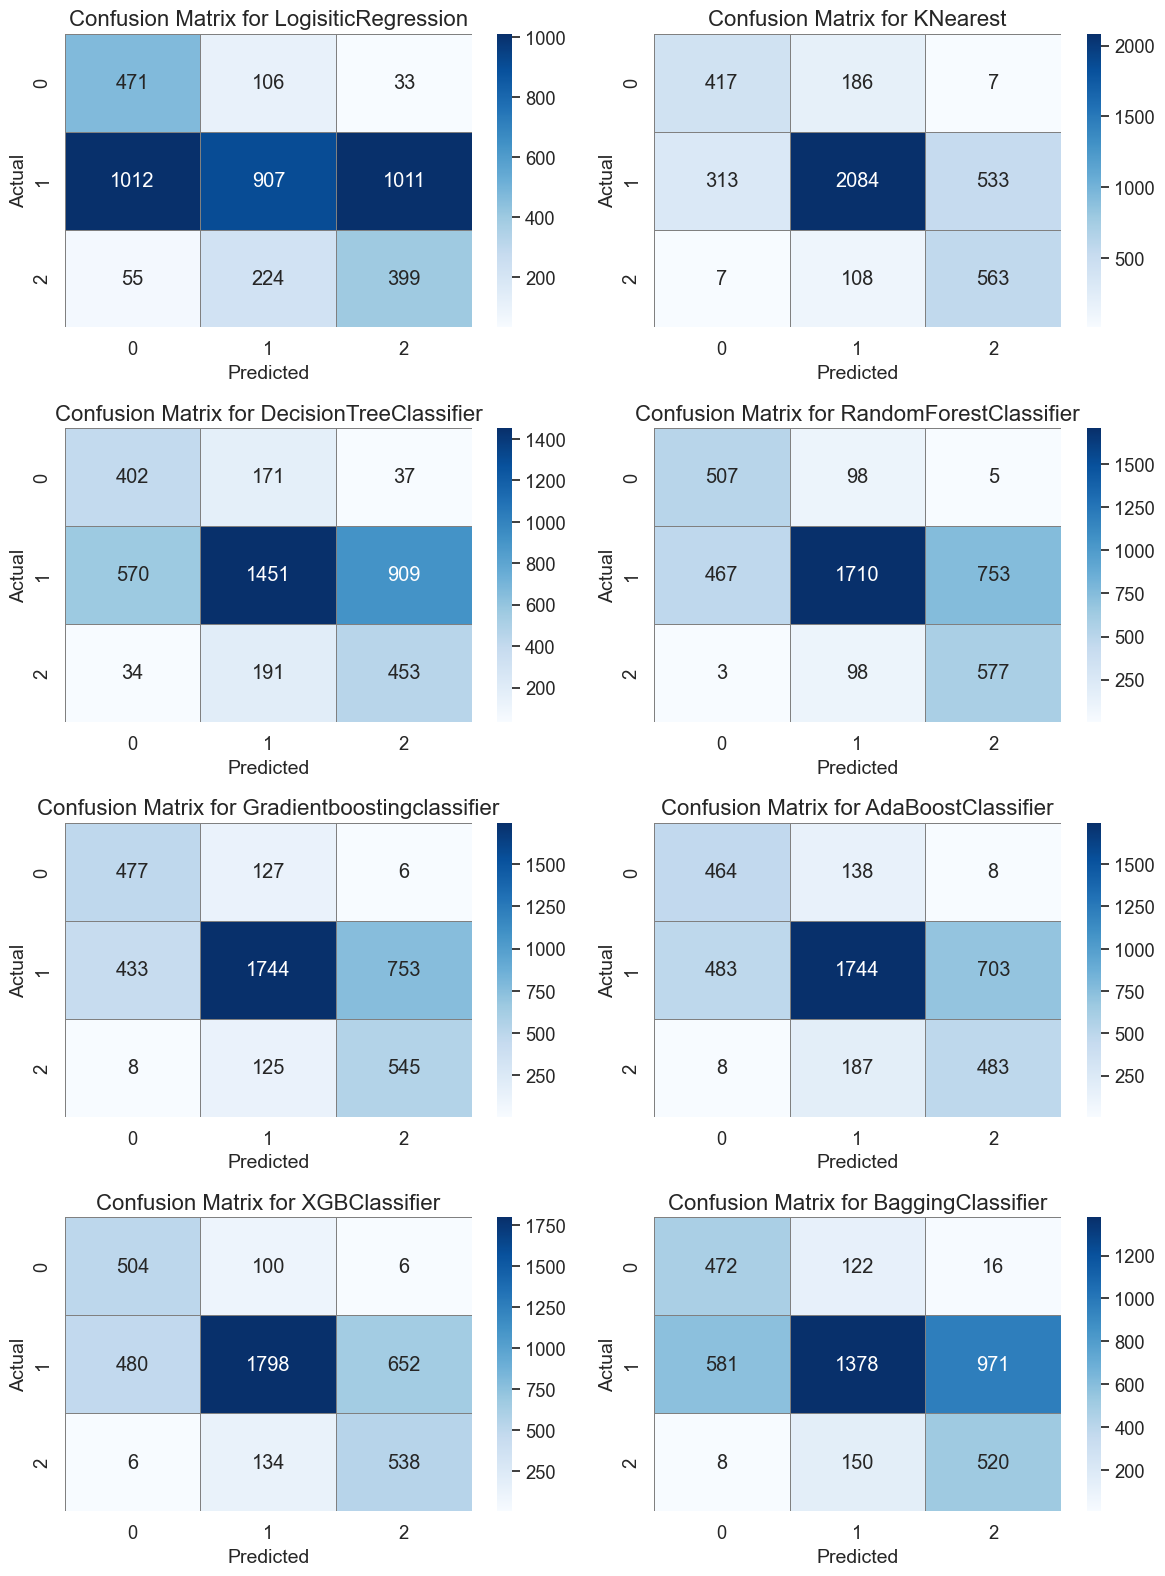

In [441]:
## Let's plot the confusion matrix for all the models
def plot_confusion_matrix(ax, y_true, y_pred, classifier_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1.2)  # Increase font size
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', linewidths=0.5, linecolor='gray', ax=ax)  # Add linewidths and linecolor
    ax.set_title(f'Confusion Matrix for {classifier_name}', fontsize=16)  # Increase title font size
    ax.set_xlabel('Predicted', fontsize=14)  # Increase x-axis label font size
    ax.set_ylabel('Actual', fontsize=14)  # Increase y-axis label font size
    ax.set_xticks(np.arange(len(np.unique(y_true))) + 0.5)  # Adjust x-axis ticks position
    ax.set_yticks(np.arange(len(np.unique(y_true))) + 0.5)  # Adjust y-axis ticks position
    ax.set_xticklabels(np.unique(y_true))  # Set x-axis tick labels
    ax.set_yticklabels(np.unique(y_true))  # Set y-axis tick labels
    
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # Create subplots with 4 rows and 2 columns

for (classifier_name, classifier), ax in zip(classifiers.items(), axes.flatten()):
    classifier.fit(X_train, y_train)  # Fit the classifier
    y_pred = classifier.predict(X_test)  # Predict labels
    plot_confusion_matrix(ax, y_true, y_pred, classifier_name)

plt.tight_layout()
plt.show()

# CONCLUSION

In [442]:
Score

LogisiticRegression  KNearest DecisionTreeClassifier  \
C_validation                0.58      0.72                   0.66   
Precision               0.400427  0.723092               0.518729   
MSE                     0.641299  0.283547               0.517781   

             RandomForestClassifier Gradientboostingclassifier  \
C_validation                   0.75                       0.75   
Precision                  0.648412                   0.652442   
MSE                        0.355382                   0.354196   

             AdaBoostClassifier XGBClassifier BaggingClassifier  
C_validation               0.72          0.74              0.73  
Precision              0.634187       0.67046           0.56733  
MSE                      0.3734       0.33523           0.44642

We've developed a straightforward model capable of classifying English proficiency levels based on essay content and essay type. Throughout the process, we cleaned the input data, engineered features to gauge text complexity and quality, and optimized classifier hyperparameters to enhance performance. Additionally, we addressed the challenge of imbalanced class distribution.

Our analysis reveals that the RandomForestClassifier emerges as the most effective model, achieving a precision score of 66%. This classifier demonstrates commendable performance in tackling the problem.

While our current accuracy stands at 66% across three proficiency classes (poor, average, and great), there's room for improvement. One avenue is enhancing feature engineering by incorporating advanced techniques like Count n-grams or leveraging sophisticated text vectorizers that utilize information extraction and grammar rules. Another approach involves refining classifiers through more exhaustive hyperparameter tuning or exploring neural network architectures. Lastly, employing feature selection methods such as Principal Component Analysis (PCA) or Recursive Feature Elimination (RFE) could further enhance model performance, mitigate overfitting, and improve interpretability.
